## Import the library

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from sklearn.ensemble import RandomForestClassifier

## Load the Dataset

In [2]:
dataset_df = pd.read_csv('train.csv')
dataset_df.shape

(1460, 81)

In [3]:
dataset_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Drop the id column

In [4]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Inspect the types of feature columns

In [5]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## House Price Distribution

In [6]:
dataset_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

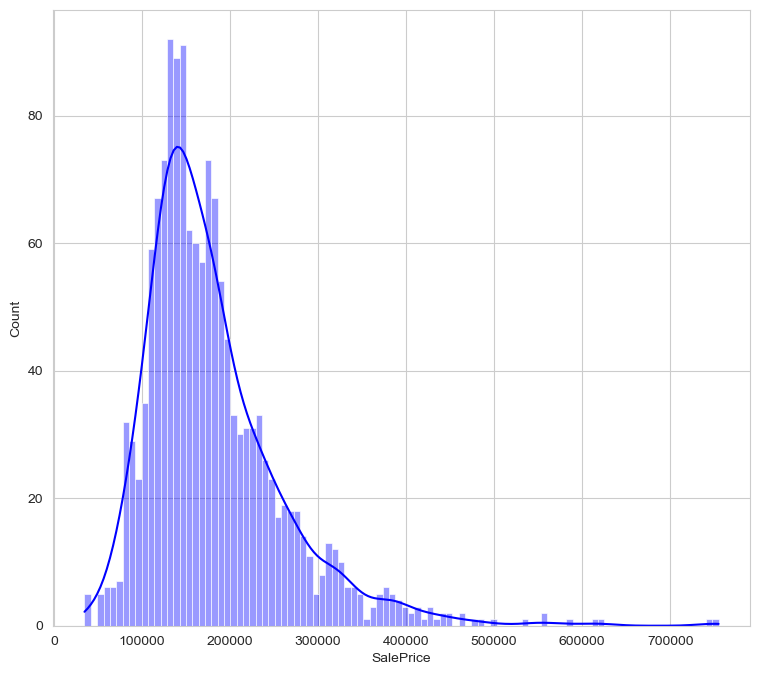

In [16]:
plt.figure(figsize=(9, 8))
sns.histplot(dataset_df['SalePrice'], color='blue', bins=100, kde=True, alpha=0.4)
plt.show()

## Numerical data distribution

First list all the types of data from our dataset and select only the numerical ones.

In [17]:
list(set(dataset_df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [18]:
df_num= dataset_df.select_dtypes(include=['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Plot the distribution for all the numerical features.

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

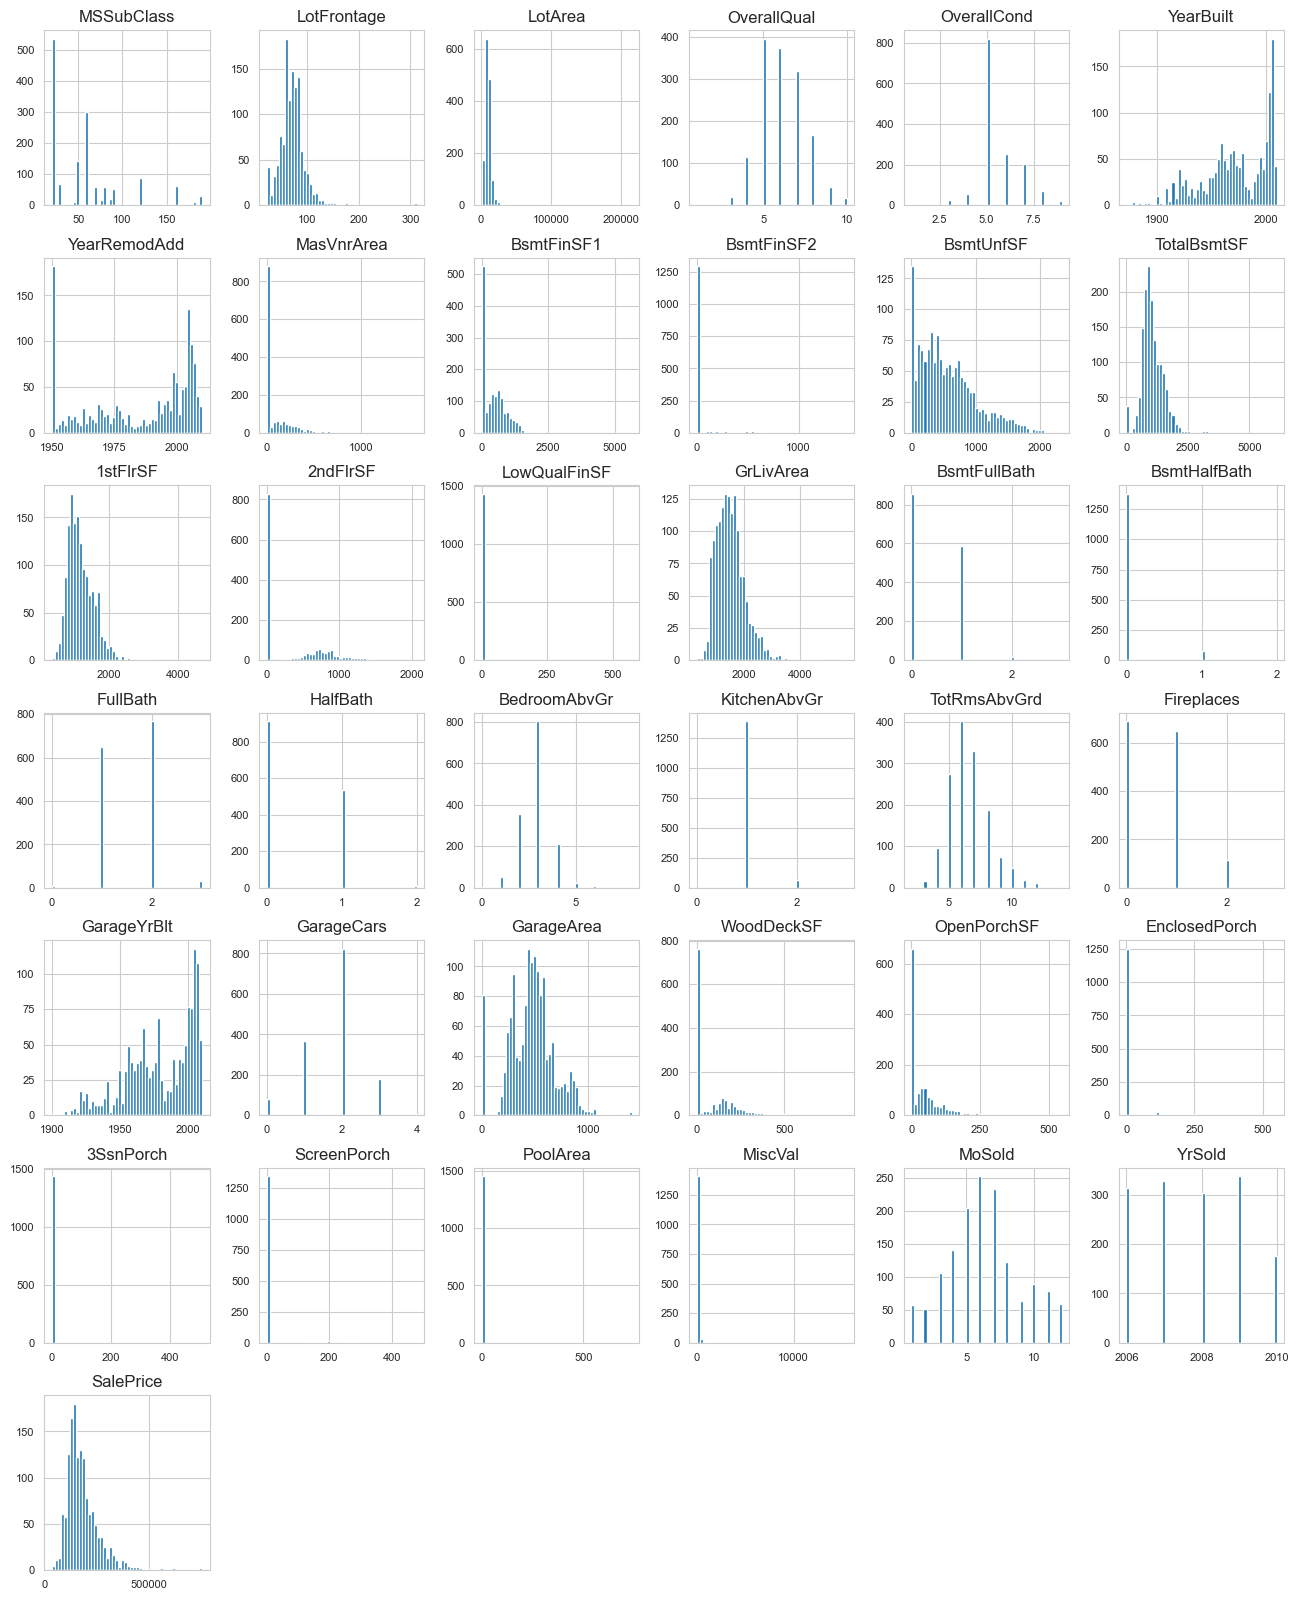

In [19]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Prepare the dataset

Split the dataset into training and testing datasets:

In [20]:
from sklearn.model_selection import train_test_split

train_ds_pd, valid_ds_pd = train_test_split(dataset_df, test_size=0.3, random_state=42, shuffle=True)

print(f"{len(train_ds_pd)} examples in training set, {len(valid_ds_pd)} examples in validation set")

1022 examples in training set, 438 examples in validation set


Process raw training and validation data into feature matrices that can be fed into a machine learning model.

Steps include:
- Split features (X) and labels (y).
- Identify numeric and categorical features.
- Fill missing values in numeric features (median) and one-hot encode categorical features.
- Transform both training and validation data into numeric matrices.

The resulting X_train_proc and X_valid_proc can be directly used to train a RandomForest or other scikit-learn models.

In [21]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

label = "SalePrice"

# Split features and labels
X_train = train_ds_pd.drop(columns=[label])
y_train = train_ds_pd[label]
X_valid = valid_ds_pd.drop(columns=[label])
y_valid = valid_ds_pd[label]

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Preprocessor: fill missing values and encode categorical columns
preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), numeric_cols),  # Fill missing numeric values with median
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical features
])

# Fit preprocessor on training data and transform both train and validation sets
X_train_proc = preprocessor.fit_transform(X_train)
X_valid_proc = preprocessor.transform(X_valid)

## Create a Random Forest

In [22]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_proc, y_train)

y_pred = rf.predict(X_valid_proc)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Validation RMSE: {rmse:.2f}")

Validation RMSE: 26623.64


## Visualize the model

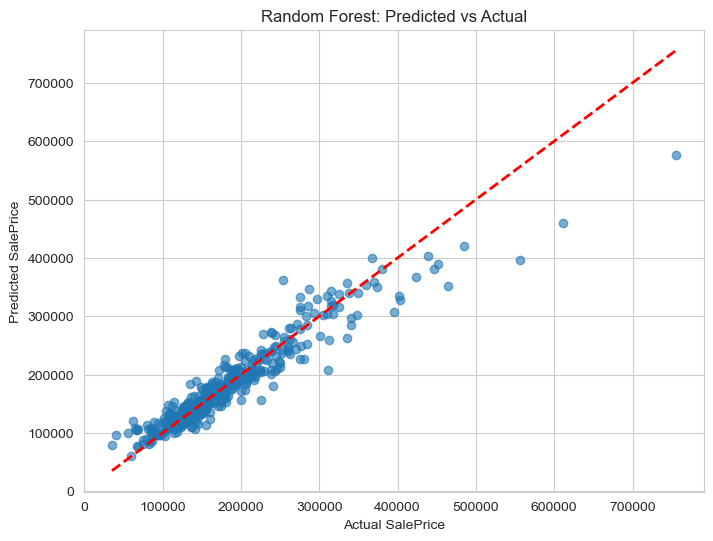

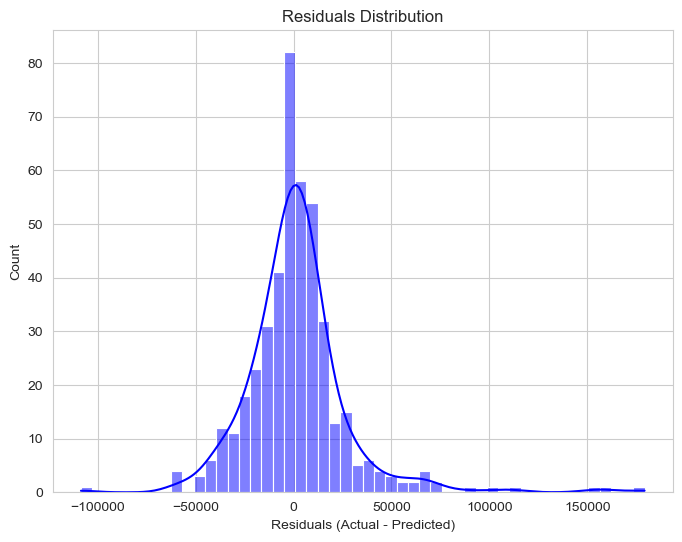

In [33]:
# 1. Predicted vs Actual plot
plt.figure(figsize=(8,6))
plt.scatter(y_valid, y_pred, alpha=0.6)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', linewidth=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Random Forest: Predicted vs Actual")
plt.show()

# 2. Residuals distribution
residuals = y_valid - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=50, kde=True, color='blue')
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Count")
plt.title("Residuals Distribution")
plt.show()

## Evaluate the model on the Out of bag (OOB) data and the validation dataset

I use Out of Bag (OOB) score to validate RandomForestModel. To train a Random Forest Model, a set of random samples from training set are choosen by the algorithm and the rest of the samples are used to finetune the model.The subset of data that is not chosen is known as Out of bag data (OOB). OOB score is computed on the OOB data.

During the training process of a random forest, each time a new tree is grown, the model can use the out-of-bag (OOB) data to make predictions and calculate the RMSE. As the number of trees increases, this produces a curve:

- The x-axis: the number of trees in the forest.
- The y-axis: the RMSE computed on the OOB dataset.

/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


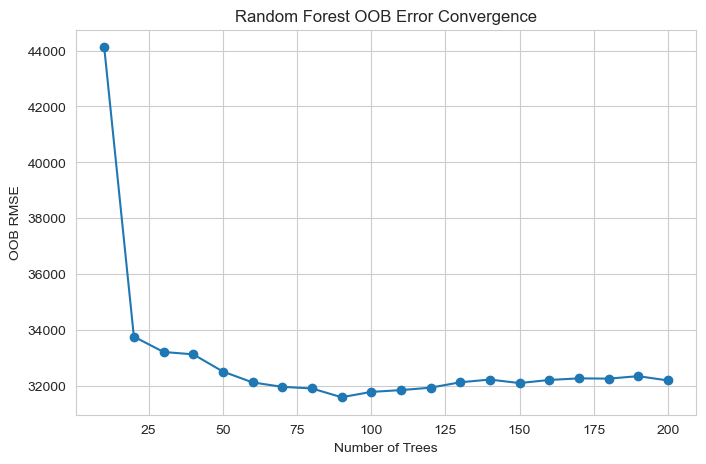

In [23]:
oob_rmse_list = []
n_trees = range(10, 201, 10)

for n in n_trees:
    rf = RandomForestRegressor(
        n_estimators=n,
        random_state=42,
        oob_score=True,
        bootstrap=True
    )
    rf.fit(X_train_proc, y_train)
    oob_pred = rf.oob_prediction_
    rmse = np.sqrt(mean_squared_error(y_train, oob_pred))
    oob_rmse_list.append(rmse)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(n_trees, oob_rmse_list, marker="o")
plt.xlabel("Number of Trees")
plt.ylabel("OOB RMSE")
plt.title("Random Forest OOB Error Convergence")
plt.show()

In [35]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    oob_score=True
)
rf.fit(X_train_proc, y_train)

# 1. Run an evaluation using the OOB dataset
oob_predictions = rf.oob_prediction_
oob_rmse = np.sqrt(mean_squared_error(y_train, oob_predictions))
print(f"OOB RMSE: {oob_rmse:.2f}")

# 2. Run an evaluation using the validation dataset
y_pred_valid = rf.predict(X_valid_proc)
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
print(f"Validation RMSE: {valid_rmse:.2f}")

OOB RMSE: 31781.05
Validation RMSE: 26623.64


## Variable Importances

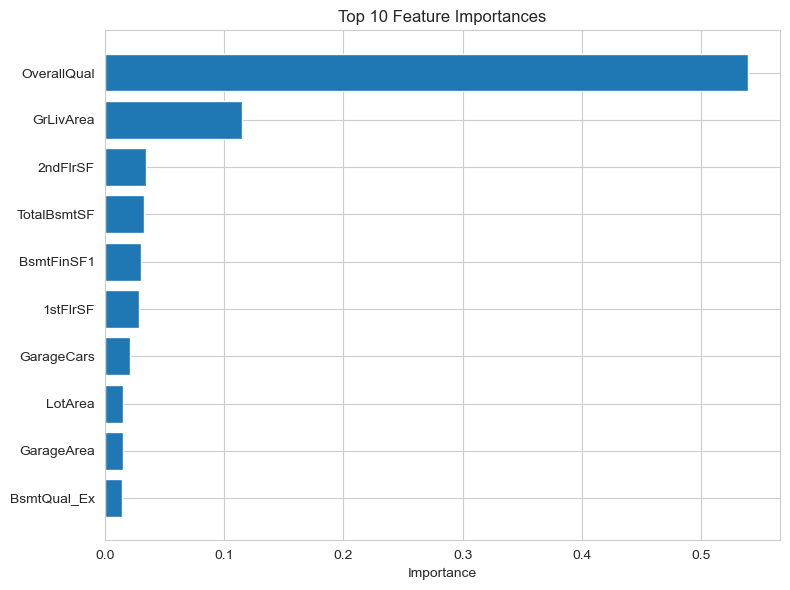

In [43]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_proc, y_train)

importances = rf.feature_importances_

# Get feature names
num_features = numeric_cols.tolist()
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = np.concatenate([num_features, cat_features])

# Select top 10 important features
indices = np.argsort(importances)[::-1]

top_n = 10
top_indices = indices[:top_n]

plt.figure(figsize=(8, 6))
plt.title(f"Top {top_n} Feature Importances")
plt.barh(range(top_n), importances[top_indices], align="center")
plt.yticks(range(top_n), [feature_names[i] for i in top_indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

## Prediction

In [46]:
test_data = pd.read_csv('test.csv')
ids = test_data.pop('Id')
X_test_proc = preprocessor.transform(test_data)
preds = rf.predict(X_test_proc)
output = pd.DataFrame({'Id': ids, 'SalePrice': preds})
output.head()

,Id,SalePrice
0,1461,126456.50
1,1462,156205.00
2,1463,186078.00
3,1464,185139.55
4,1465,203593.00


In [ ]:
sample_submission_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = preds
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)

sample_submission_df.head()